# Investigating Graphene
Nothing profound here, just playing around with routines to calculate 2D materials, and thought that graphene would be a good place to start.

Todo:
* Computer graphics have the y axis pointing down, which is the opposite of what most molecular graphics use. Figure out a pythonic way to do this transformation
* Recompute the bounding box and shift so that all objects are visible even if they go negative.

In [17]:
import math

class Lattice2D:
    def __init__(self,A,B,alpha=90,scalef=100):
        self.A = A
        self.B = B
        self.alpha = alpha
        self.atoms = []
        self.scalef = scalef
        return
    
    def add_atom(self,symbol,x,y):
        # Note, coordinates are in lattice coords
        self.atoms.append((symbol,x,y))
        return
    
    def _repr_svg_(self): return self.to_svg()
    
    def to_svg(self):
        from svgscene import Scene
        deg = math.pi/180
        alpha = self.alpha*deg
        A = self.scalef*self.A
        B = self.scalef*self.B
        self.scene = Scene()
        self.scene.line((0,0),(A,0))
        self.scene.line((0,0),(B*math.cos(alpha),B*math.sin(alpha)))
        for atom in self.atoms:
            rad = self.scalef*0.5
            self.scene.circle((atom[1],atom[2]),rad)
        return self.scene.to_svg()

class HexLattice(Lattice2D):
    def __init__(self,A,scalef=100):
        Lattice2D.__init__(self,A,A,60,scalef)

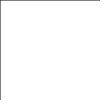

In [14]:
Lattice2D(1,1)

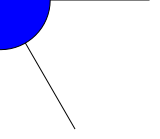

In [18]:
graphene = HexLattice(1.5)
graphene.add_atom('C',0,0)
graphene

Okay, this now works with Py3. Added encoding="unicode" to the ET.tostring() call. Have to think of a pythonic way to transform from graphical coordinates (y points down) to the normal way we draw structures.